In [1]:
#Dependencies for analysis with pandas and numpy
import pandas as pd
import numpy as np

#Dependencies for graphs
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

#Dependencies for plotly
import plotly.graph_objs as plotly
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

#Dependencies for stat analysis with sklearn
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split


In [2]:
#Import data
wine_df = pd.read_csv('static/data/winemag-data-130k.csv')
wine_df.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


<class 'pandas.core.frame.DataFrame'>
Int64Index: 111511 entries, 29553 to 80290
Data columns (total 13 columns):
points                   111511 non-null int64
title                    111511 non-null object
description              111511 non-null object
taster_name              88244 non-null object
taster_twitter_handle    83761 non-null object
price                    111511 non-null float64
designation              79472 non-null object
variety                  111511 non-null object
region_1                 93556 non-null object
region_2                 46559 non-null object
province                 111511 non-null object
country                  111511 non-null object
winery                   111511 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 16.9+ MB


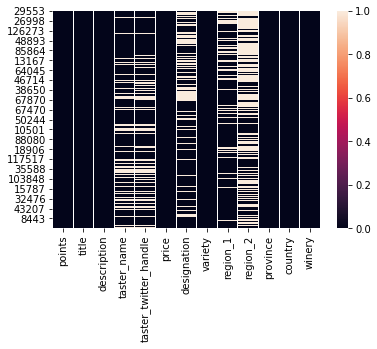

(111511, 13)

In [48]:
#Visualize the initial dataset
wine_df.info()
#See how many values are null
sns.heatmap(wine_df.isnull())
plt.show()
#See how many rows and columns
wine_df.shape

In [4]:
#get dupes information
wine_df[wine_df.duplicated('description',keep=False)].sort_values('description').count()

Unnamed: 0               20026
country                  20018
description              20026
designation              14162
points                   20026
price                    18814
province                 20018
region_1                 16648
region_2                  7498
taster_name              17362
taster_twitter_handle    16482
title                    20026
variety                  20026
winery                   20026
dtype: int64

In [5]:
null_columns=wine_df.columns[wine_df.isnull().any()]
wine_df[null_columns].isnull().sum()

country                     63
designation              37465
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
variety                      1
dtype: int64

In [6]:
print(wine_df[wine_df["country"].isnull()][null_columns])

       country                                  designation  price province  \
913        NaN                               Asureti Valley   30.0      NaN   
3131       NaN                                     Partager    NaN      NaN   
4243       NaN                     Red Naturally Semi-Sweet   18.0      NaN   
9509       NaN               Theopetra Malagouzia-Assyrtiko   28.0      NaN   
9750       NaN                    Orange Nikolaevo Vineyard   28.0      NaN   
11150      NaN                                          NaN   20.0      NaN   
11348      NaN                                     Partager    NaN      NaN   
14030      NaN                                        Márga   25.0      NaN   
16000      NaN            Valle de los Manantiales Vineyard   40.0      NaN   
16749      NaN      Cape Winemakers Guild Vloekskoot Wooded    NaN      NaN   
18075      NaN                                    Askitikos   17.0      NaN   
26485      NaN                                      

In [7]:
print(wine_df[wine_df["price"].isnull()][null_columns])

             country                           designation  price  \
0              Italy                          Vulkà Bianco    NaN   
13             Italy                                 Rosso    NaN   
30            France                               Nouveau    NaN   
31             Italy          Calanìca Nero d'Avola-Merlot    NaN   
32             Italy              Calanìca Grillo-Viognier    NaN   
50             Italy                                Scialo    NaN   
54             Italy                                 Rosso    NaN   
79          Portugal                                Bridão    NaN   
137     South Africa                       Hope Marguerite    NaN   
159            Italy                          Filo di Seta    NaN   
163           France  Hospices Civils de Romanèche Thurins    NaN   
182            Italy                              M. Vigna    NaN   
194            Italy                                   NaN    NaN   
200            Italy              

In [8]:
#It won't make sense to substitute null price values with exponential smoothing or a simple average. It ranges from $15 to $235
#wine_df['designation']="Vigna Piaggia"
#wine_df

In [9]:
#wine_df['country']="Italy"
#wine_df

In [10]:
print(wine_df[wine_df.isnull().any(axis=1)][null_columns].head())

    country           designation  price           province  \
0     Italy          Vulkà Bianco    NaN  Sicily & Sardinia   
1  Portugal              Avidagos   15.0              Douro   
2        US                   NaN   14.0             Oregon   
3        US  Reserve Late Harvest   13.0           Michigan   
5     Spain          Ars In Vitro   15.0     Northern Spain   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
5              Navarra                NaN   Michael Schachner   

  taster_twitter_handle             variety  
0          @kerinokeefe         White Blend  
1            @vossroger      Portuguese Red  
2           @paulgwine           Pinot Gris  
3                   NaN            Riesling  


In [11]:
#Explore the duplicates
wine_df[wine_df.duplicated('description',keep=False)].sort_values('description').head(6)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
67614,67614,US,"100% Malbec, it's redolent with dark plums, wi...",NaN,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge
46540,46540,US,"100% Malbec, it's redolent with dark plums, wi...",NaN,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge
119702,119702,US,"100% Sangiovese, this pale pink wine has notes...",Meadow,88,18.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,Rosé,Ross Andrew
72181,72181,US,"100% Sangiovese, this pale pink wine has notes...",Meadow,88,18.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,Rosé,Ross Andrew
73731,73731,France,"87-89 Barrel sample. A pleasurable, perfumed w...",Barrel sample,88,NaN,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château Lalande-Borie 2008 Barrel sample (Sai...,Bordeaux-style Red Blend,Château Lalande-Borie
100745,100745,France,"87-89 Barrel sample. A pleasurable, perfumed w...",Barrel sample,88,NaN,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château Lalande-Borie 2008 Barrel sample (Sai...,Bordeaux-style Red Blend,Château Lalande-Borie


In [12]:
wine_df.shape

(129971, 14)

In [13]:
#Drop duplicates with the same description
wine_df1 = wine_df.drop_duplicates('description')
wine_df1.shape

(119955, 14)

In [14]:
#Drop null varieties
wine_df2 = wine_df1[pd.notnull(wine_df1.variety)]
wine_df2.shape

(119954, 14)

In [15]:
#Drop null prices
wine_df3 = wine_df2[pd.notnull(wine_df2.price)]
wine_df3.shape

(111566, 14)

In [16]:
null_columns=wine_df3.columns[wine_df3.isnull().any()]
wine_df3[null_columns].isnull().sum()

country                     55
designation              32049
province                    55
region_1                 18010
region_2                 65007
taster_name              23267
taster_twitter_handle    27750
dtype: int64

In [17]:
#Drop null countries
wine_df4 = wine_df3[pd.notnull(wine_df3.country)]
wine_df4.shape

(111511, 14)

In [18]:
null_columns=wine_df4.columns[wine_df4.isnull().any()]
wine_df4[null_columns].isnull().sum()

designation              32039
region_1                 17955
region_2                 64952
taster_name              23267
taster_twitter_handle    27750
dtype: int64

In [19]:
#Drop original index
cleaned_wine = wine_df4.drop(['Unnamed: 0'],axis =1)
cleaned_wine

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature


In [20]:
#Rearrange the dataframe
wine = cleaned_wine[["points","title","description","taster_name","taster_twitter_handle","price","designation","variety","region_1","region_2","province","country", "winery" ]]
wine

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
1,87,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Roger Voss,@vossroger,15.0,Avidagos,Portuguese Red,NaN,NaN,Douro,Portugal,Quinta dos Avidagos
2,87,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",Paul Gregutt,@paulgwine,14.0,NaN,Pinot Gris,Willamette Valley,Willamette Valley,Oregon,US,Rainstorm
3,87,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Alexander Peartree,NaN,13.0,Reserve Late Harvest,Riesling,Lake Michigan Shore,NaN,Michigan,US,St. Julian
4,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Paul Gregutt,@paulgwine,65.0,Vintner's Reserve Wild Child Block,Pinot Noir,Willamette Valley,Willamette Valley,Oregon,US,Sweet Cheeks
5,87,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Blackberry and raspberry aromas show a typical...,Michael Schachner,@wineschach,15.0,Ars In Vitro,Tempranillo-Merlot,Navarra,NaN,Northern Spain,Spain,Tandem
6,87,Terre di Giurfo 2013 Belsito Frappato (Vittoria),"Here's a bright, informal red that opens with ...",Kerin O’Keefe,@kerinokeefe,16.0,Belsito,Frappato,Vittoria,NaN,Sicily & Sardinia,Italy,Terre di Giurfo
7,87,Trimbach 2012 Gewurztraminer (Alsace),This dry and restrained wine offers spice in p...,Roger Voss,@vossroger,24.0,NaN,Gewürztraminer,Alsace,NaN,Alsace,France,Trimbach
8,87,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Savory dried thyme notes accent sunnier flavor...,Anna Lee C. Iijima,NaN,12.0,Shine,Gewürztraminer,NaN,NaN,Rheinhessen,Germany,Heinz Eifel
9,87,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,This has great depth of flavor with its fresh ...,Roger Voss,@vossroger,27.0,Les Natures,Pinot Gris,Alsace,NaN,Alsace,France,Jean-Baptiste Adam
10,87,Kirkland Signature 2011 Mountain Cuvée Caberne...,"Soft, supple plum envelopes an oaky structure ...",Virginie Boone,@vboone,19.0,Mountain Cuvée,Cabernet Sauvignon,Napa Valley,Napa,California,US,Kirkland Signature


In [21]:
wine.shape

(111511, 13)

In [22]:
#Sort by price
wine_df = wine.sort_values('price')
wine_df

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
29553,84,Broke Ass 2009 Red Malbec-Syrah (Mendoza),"Crimson in color but also translucent, with a ...",Michael Schachner,@wineschach,4.0,Red,Malbec-Syrah,Mendoza,NaN,Mendoza Province,Argentina,Broke Ass
61768,84,Terrenal 2010 Cabernet Sauvignon (Yecla),This opens with standard cherry and berry arom...,Michael Schachner,@wineschach,4.0,NaN,Cabernet Sauvignon,Yecla,NaN,Levante,Spain,Terrenal
126096,86,Cramele Recas 2011 UnWineD Pinot Grigio (Viile...,Notes of sun-dried hay and green flower highli...,Anna Lee C. Iijima,NaN,4.0,UnWineD,Pinot Grigio,NaN,NaN,Viile Timisului,Romania,Cramele Recas
64590,86,Bandit NV Merlot (California),"There's a lot going on in this Merlot, which i...",NaN,NaN,4.0,NaN,Merlot,California,California Other,California,US,Bandit
117303,82,Felix Solis 2012 Flirty Bird White (Vino de la...,"Tropical fruit and citrus aromas aren't bad, b...",Michael Schachner,@wineschach,4.0,Flirty Bird,White Blend,Vino de la Tierra de Castilla,NaN,Central Spain,Spain,Felix Solis
112919,84,Terrenal 2010 Estate Bottled Tempranillo (Yecla),"Nice on the nose, this has a leafy note and a ...",Michael Schachner,@wineschach,4.0,Estate Bottled,Tempranillo,Yecla,NaN,Levante,Spain,Terrenal
110255,84,Bandit NV Merlot (California),"A good everyday Merlot, dry and rich in tannin...",NaN,NaN,4.0,NaN,Merlot,California,California Other,California,US,Bandit
59507,83,Pam's Cuties NV Unoaked Chardonnay (California),"Sweet and fruity, this canned wine feels soft ...",Jim Gordon,@gordone_cellars,4.0,Unoaked,Chardonnay,California,California Other,California,US,Pam's Cuties
20484,85,Dancing Coyote 2015 White (Clarksburg),"Fruity, soft and rather sweet, this wine smell...",Jim Gordon,@gordone_cellars,4.0,NaN,White Blend,Clarksburg,Central Valley,California,US,Dancing Coyote
1987,85,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Berry and cherry aromas are surprisingly sturd...,Michael Schachner,@wineschach,4.0,Flirty Bird,Syrah,Vino de la Tierra de Castilla,NaN,Central Spain,Spain,Felix Solis


In [23]:
#Replace US for United States
wine_reviews = wine_df.replace("US", "United States")
wine_reviews

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
29553,84,Broke Ass 2009 Red Malbec-Syrah (Mendoza),"Crimson in color but also translucent, with a ...",Michael Schachner,@wineschach,4.0,Red,Malbec-Syrah,Mendoza,NaN,Mendoza Province,Argentina,Broke Ass
61768,84,Terrenal 2010 Cabernet Sauvignon (Yecla),This opens with standard cherry and berry arom...,Michael Schachner,@wineschach,4.0,NaN,Cabernet Sauvignon,Yecla,NaN,Levante,Spain,Terrenal
126096,86,Cramele Recas 2011 UnWineD Pinot Grigio (Viile...,Notes of sun-dried hay and green flower highli...,Anna Lee C. Iijima,NaN,4.0,UnWineD,Pinot Grigio,NaN,NaN,Viile Timisului,Romania,Cramele Recas
64590,86,Bandit NV Merlot (California),"There's a lot going on in this Merlot, which i...",NaN,NaN,4.0,NaN,Merlot,California,California Other,California,United States,Bandit
117303,82,Felix Solis 2012 Flirty Bird White (Vino de la...,"Tropical fruit and citrus aromas aren't bad, b...",Michael Schachner,@wineschach,4.0,Flirty Bird,White Blend,Vino de la Tierra de Castilla,NaN,Central Spain,Spain,Felix Solis
112919,84,Terrenal 2010 Estate Bottled Tempranillo (Yecla),"Nice on the nose, this has a leafy note and a ...",Michael Schachner,@wineschach,4.0,Estate Bottled,Tempranillo,Yecla,NaN,Levante,Spain,Terrenal
110255,84,Bandit NV Merlot (California),"A good everyday Merlot, dry and rich in tannin...",NaN,NaN,4.0,NaN,Merlot,California,California Other,California,United States,Bandit
59507,83,Pam's Cuties NV Unoaked Chardonnay (California),"Sweet and fruity, this canned wine feels soft ...",Jim Gordon,@gordone_cellars,4.0,Unoaked,Chardonnay,California,California Other,California,United States,Pam's Cuties
20484,85,Dancing Coyote 2015 White (Clarksburg),"Fruity, soft and rather sweet, this wine smell...",Jim Gordon,@gordone_cellars,4.0,NaN,White Blend,Clarksburg,Central Valley,California,United States,Dancing Coyote
1987,85,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Berry and cherry aromas are surprisingly sturd...,Michael Schachner,@wineschach,4.0,Flirty Bird,Syrah,Vino de la Tierra de Castilla,NaN,Central Spain,Spain,Felix Solis


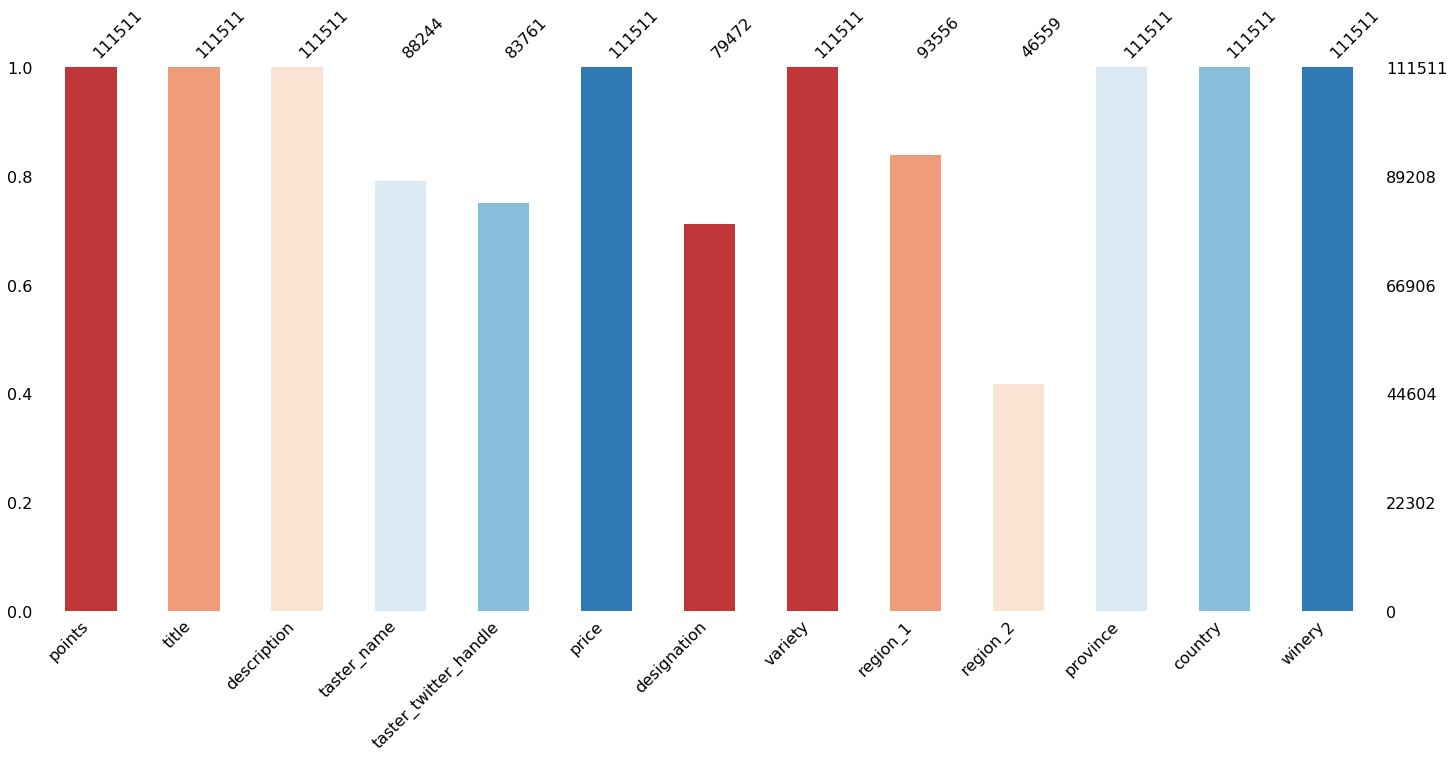

In [24]:
#View null values in a graph
msno.bar(wine_df,color= sns.color_palette('RdBu'))
plt.show()

In [25]:
#Save to a JSON Object
wine_reviews.to_json("static/data/winemag.js",orient='records')

In [26]:
#Save final dataset to a CSV file
wine_reviews.to_csv("static/data/winemag.csv", sep=',', header=True, index=False)

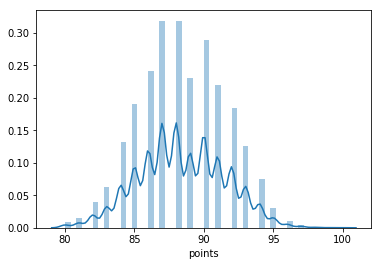

In [27]:
sns.distplot(wine_reviews['points'])
plt.show()

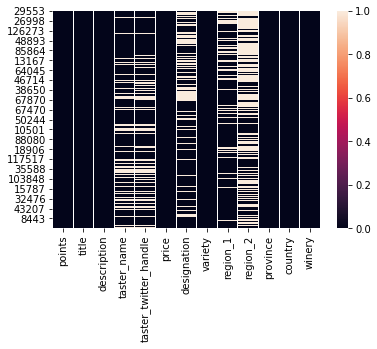

In [28]:
sns.heatmap(wine_reviews.isnull())
plt.show()

In [29]:
wine_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111511 entries, 29553 to 80290
Data columns (total 13 columns):
points                   111511 non-null int64
title                    111511 non-null object
description              111511 non-null object
taster_name              88244 non-null object
taster_twitter_handle    83761 non-null object
price                    111511 non-null float64
designation              79472 non-null object
variety                  111511 non-null object
region_1                 93556 non-null object
region_2                 46559 non-null object
province                 111511 non-null object
country                  111511 non-null object
winery                   111511 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 16.9+ MB


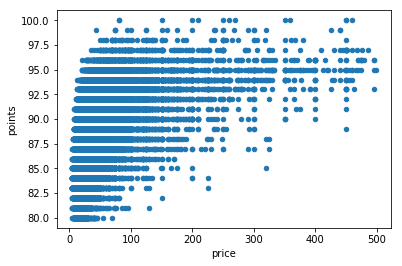

In [30]:
wine_reviews[wine_reviews['price'] < 500].plot.scatter(x='price', y='points')
plt.show()

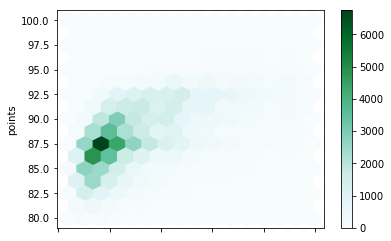

In [31]:
wine_reviews[wine_reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15)
plt.show()

In [32]:
iplot([plotly.Scatter(x=wine.head(1000)['points'], y=wine.head(1000)['price'], mode='markers')])

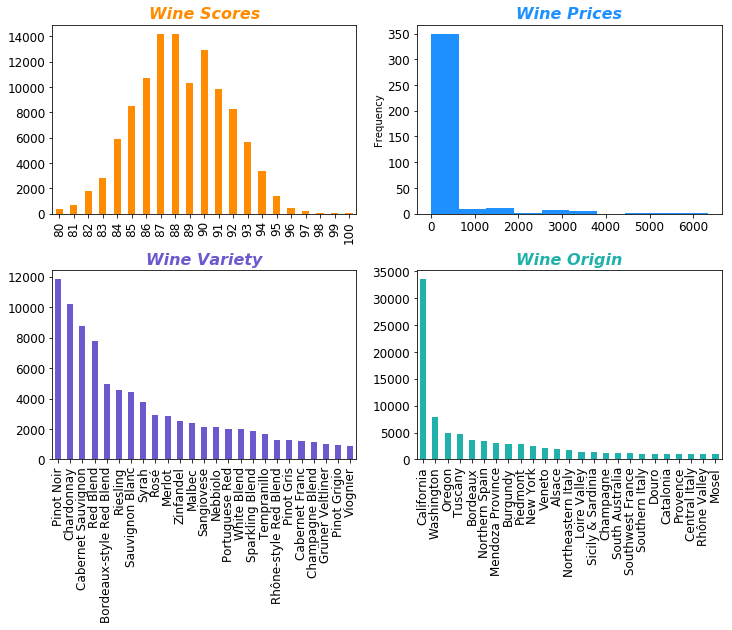

In [33]:
#subplots return 2 things: figure = fig and an array of the axes contained = axarr. Here are multiple rows and columns so the axes array becomes a list of lists 
#axarr
#fig
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

wine['points'].value_counts().sort_index().plot.bar(ax=axarr[0][0], fontsize=12, color='darkorange')
axarr[0][0].set_title("Wine Scores", fontsize=16,style = 'italic', color ='darkorange', weight = 'bold')

wine['price'].value_counts().plot.hist(ax=axarr[0][1], fontsize=12, color='dodgerblue')
axarr[0][1].set_title("Wine Prices", fontsize=16, style = 'italic', color ='dodgerblue', weight = 'bold')

wine['variety'].value_counts().head(25).plot.bar(ax=axarr[1][0], fontsize=12, color='slateblue')
axarr[1][0].set_title("Wine Variety", fontsize=16, style = 'oblique', color ='slateblue', weight = 'bold')

wine['province'].value_counts().head(25).plot.bar(ax=axarr[1][1], fontsize=12, color='lightseagreen')
axarr[1][1].set_title("Wine Origin", fontsize=16, style = 'italic', color = 'lightseagreen',  weight = 'bold')

plt.subplots_adjust(hspace=.3)
plt.show()

In [34]:
df = wine_reviews['country'].value_counts()

iplot([plotly.Choropleth(
    locationmode='country names',
    locations=df.index.values,
    text=df.index,
    z=df.values
)])

In [35]:
wine_reviews['country'].value_counts()

United States             50229
France                    16286
Italy                     15492
Spain                      6049
Portugal                   4502
Chile                      4129
Argentina                  3500
Austria                    2535
Australia                  2169
Germany                    1951
New Zealand                1240
South Africa               1195
Israel                      453
Greece                      426
Canada                      224
Bulgaria                    132
Hungary                     128
Romania                     102
Uruguay                      98
Turkey                       81
Georgia                      74
Slovenia                     70
Mexico                       68
Croatia                      68
England                      59
Moldova                      56
Brazil                       44
Lebanon                      32
Morocco                      24
Peru                         16
Ukraine                      14
Czech Re

/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.

/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning:

Attribute 'is_copy' is deprecated and will be removed in a future version.

/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning:

Attribute 'is_copy' is deprecated and will be removed in a future version.



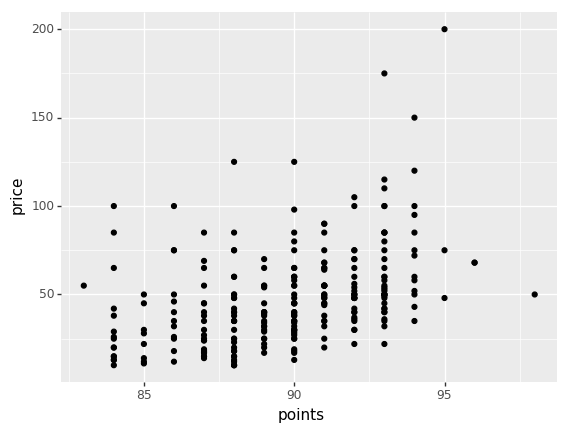

<ggplot: (307676669)>

In [36]:
from plotnine import *
top_varieties = wine[wine['variety'].isin(wine['variety'].value_counts().head(5).index)]
df = top_varieties.head(1000).dropna()

df = top_varieties.head(1000).dropna()

(ggplot(df)
 + aes('points', 'price')
 + geom_point())

/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning:

Attribute 'is_copy' is deprecated and will be removed in a future version.

/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning:

Attribute 'is_copy' is deprecated and will be removed in a future version.

/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/plotnine/stats/smoothers.py:150: UserWarning:

Confidence intervals are not yet implementedfor lowess smoothings.



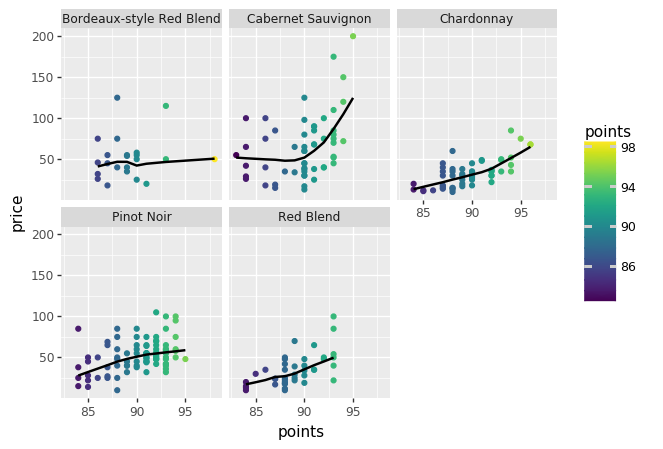

<ggplot: (313271090)>

In [37]:
df = top_varieties.head(1000).dropna()

(ggplot(df)
     + aes('points', 'price')
     + aes(color='points')
     + geom_point()
     + stat_smooth()
     + facet_wrap('~variety')
)

/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning:

Attribute 'is_copy' is deprecated and will be removed in a future version.

/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning:

Attribute 'is_copy' is deprecated and will be removed in a future version.



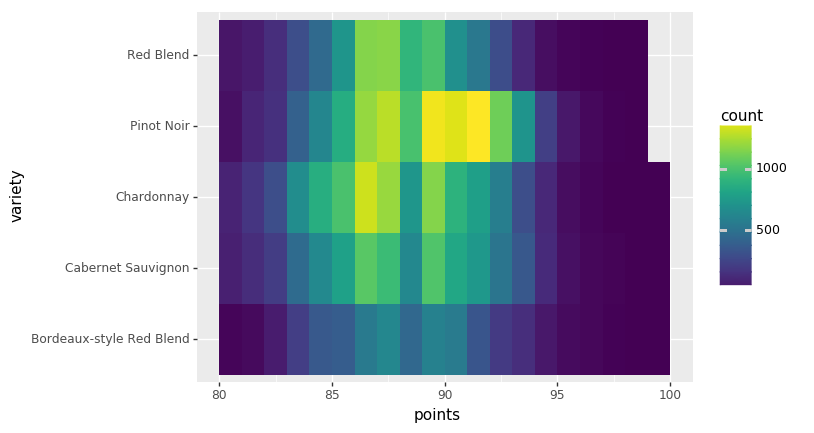

<ggplot: (314413488)>

In [38]:
(ggplot(top_varieties)
     + aes('points', 'variety')
     + geom_bin2d(bins=20)
)

In [39]:
import squarify
x = wine_reviews.groupby(['country',])['price'].count().sort_values(ascending=False).to_frame()
x2=x.head(13)

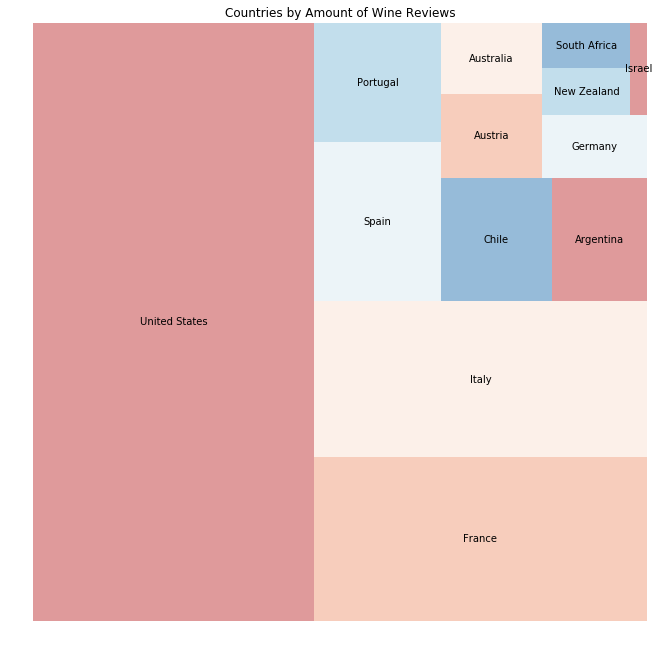

In [40]:
fig,ax = plt.subplots(1,1,figsize=(11,11))
squarify.plot(sizes=x2.values, label=x2.index.values, alpha=0.5, ax=ax, color=sns.color_palette('RdBu'))
plt.axis('off')
plt.title('Countries by Amount of Wine Reviews')
plt.show()

In [41]:
print('Number of country list in data:',wine_reviews['country'].nunique())
# wine_country = wine_df2.groupby(['country',]).mean()['price'].sort_values(ascending=False).to_frame()
# wine_country2= wine_country.dropna()
# plt.figure(figsize=(12,8))
# sns.pointplot(x = wine_df2['price'] ,y = wine_df2['country'] ,color='b',orient='h',markers='o')
# plt.title('Country wise average wine price')
# plt.xlabel('Price')
# plt.ylabel('Country')
print('Number of variety list in data:',wine_reviews['variety'].nunique())

Number of country list in data: 42
Number of variety list in data: 691


In [42]:
summary_df = wine_reviews.groupby(['country','province','points'])['price'].agg(
    ['count','min','max','mean']).sort_values(by = 'mean',ascending = False)[:30]
#summary_df.reset_index(inplace = True)
summary_df.style.highlight_max()

,,,count,min,max,mean
country,province,points,,,,
France,Bordeaux,100,5,150,1500,871.4
Australia,South Australia,99,1,850,850,850
France,Champagne,99,1,800,800,800
Germany,Rheingau,98,1,775,775,775
Portugal,Port,100,1,650,650,650
France,Bordeaux,98,6,70,1900,600.333
Germany,Rheingau,97,4,445,775,579.5
France,Burgundy,99,1,560,560,560
Portugal,Colares,93,1,495,495,495


Pearson Correlation (r): (0.41659366528776443, 0.0)
                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                 8.450e+04
Date:                Sat, 07 Jul 2018   Prob (F-statistic):               0.00
Time:                        10:59:58   Log-Likelihood:            -6.2664e+05
No. Observations:              111511   AIC:                         1.253e+06
Df Residuals:                  111510   BIC:                         1.253e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


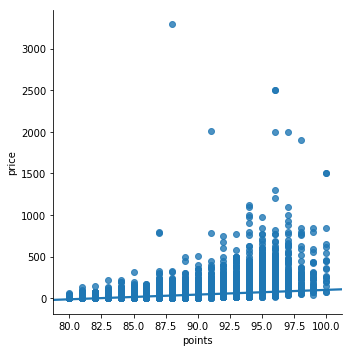

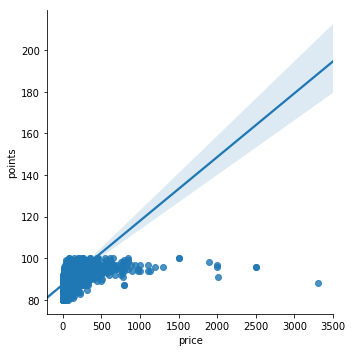

In [43]:
from scipy.stats import pearsonr
import statsmodels.api as sm
#import seaborn as sns; sns.set(color_codes=True)
cleaned_wine_df = wine[pd.notnull(wine.price)]
#cleaned_wine.shape
print("Pearson Correlation (r):", pearsonr(cleaned_wine_df.points, cleaned_wine_df.price))
reg = sm.OLS(cleaned_wine_df.points, cleaned_wine_df.price).fit()
print(reg.summary())
print('Parameters: ', reg.params)
print('Standard errors: ', reg.bse)
print('Predicted values: ', reg.predict())
sns.lmplot(y = 'price', x='points', data=cleaned_wine_df, palette='Set1')
sns.lmplot(y = 'points', x='price', data=cleaned_wine_df, palette='r')
plt.show()
#1.05 increase of the price for every point increased in the rating. 
#statistically highly significant p < 0.001. Significant correlation between points and price

/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



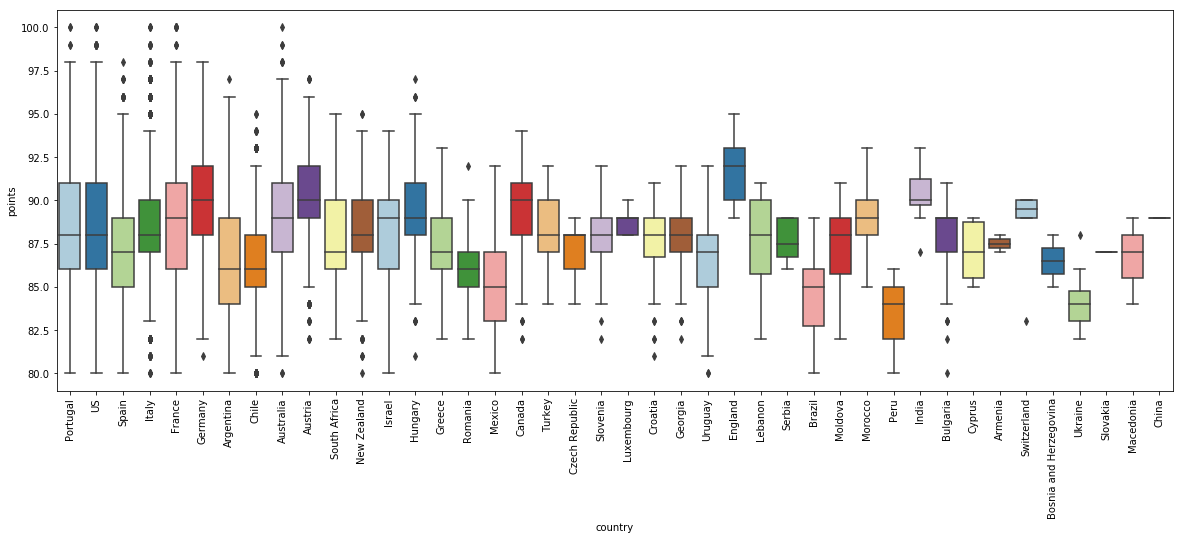

In [44]:
fig, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='country',y='points', data=cleaned_wine, ax = ax, palette = 'Paired')
plt.xticks(rotation = 90)
plt.show()

/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



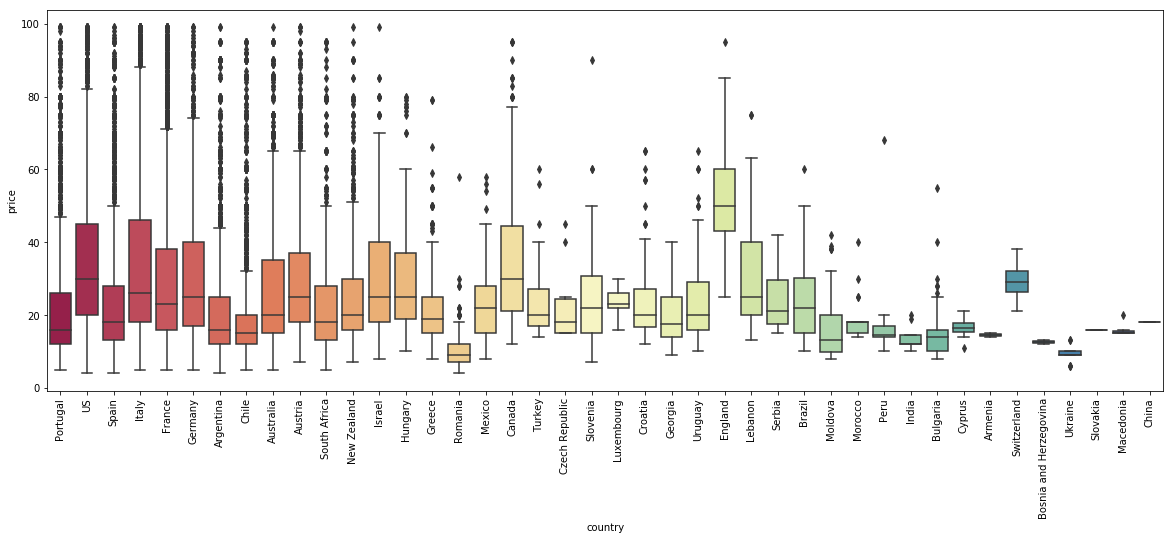

In [45]:
fig, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='country',y='price', data=wine_df2[wine_df2['price'] < 100], ax = ax, palette = 'Spectral')
plt.xticks(rotation = 90)
plt.show()